In [63]:
import pandas as pd
import matplotlib.pyplot as plt
demo = pd.read_csv('MSA_Race_Income_Density_BuildingAge.csv')

In [64]:
CBSAair = pd.read_csv("annual_aqi_by_cbsa_2017.csv")

In [65]:
# SE_T002_002 Population Density
# SE_T014_003 White Not Latino
# SE_T014_001 Total Population
# SE_T057_001 Median Household Income
# Geo_NAME Area Name + Micro/Metro
# Geo_FIPS code

In [66]:
demo["Geo"] = demo["Geo_NAME"].str.split(' ').str[0:-3].str.join(' ')
demo["CBSA Code"] = demo["Geo_FIPS"]% 100000

In [67]:
demo_mini = demo[["Geo","CBSA Code", "SE_T002_002", "SE_T014_003", "SE_T014_001", "SE_T057_001"]]
demo_mini = demo_mini.set_index("CBSA Code")
CBSAair = CBSAair.set_index("CBSA Code")

In [68]:
CBSAs = CBSAair.join(demo_mini)

In [69]:
CBSAs["Density"] = CBSAs["SE_T002_002"]
CBSAs["Income"] = CBSAs["SE_T057_001"]
CBSAs["Minority"] = 1 - CBSAs["SE_T014_003"]/CBSAs["SE_T014_001"]

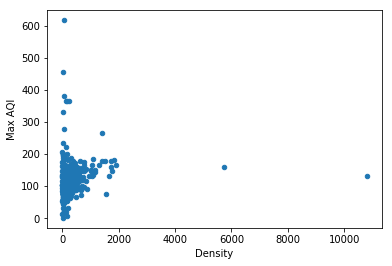

In [117]:
CBSAs.plot(x = "Density", y = "Max AQI", kind = 'scatter')
#plt.xlim((0, 3000))
#plt.ylim((0,250))
plt.show()

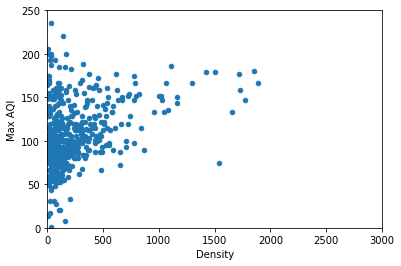

In [118]:
CBSAs.plot(x = "Density", y = "Max AQI", kind = 'scatter')
plt.xlim((0, 3000))
plt.ylim((0,250))
plt.show()

In [89]:
CBSAs.columns

Index([u'CBSA', u'Year', u'Days with AQI', u'Good Days', u'Moderate Days',
       u'Unhealthy for Sensitive Groups Days', u'Unhealthy Days',
       u'Very Unhealthy Days', u'Hazardous Days', u'Max AQI',
       u'90th Percentile AQI', u'Median AQI', u'Days CO', u'Days NO2',
       u'Days Ozone', u'Days SO2', u'Days PM2.5', u'Days PM10', u'Geo',
       u'SE_T002_002', u'SE_T014_003', u'SE_T014_001', u'SE_T057_001',
       u'Density', u'Income', u'Minority'],
      dtype='object')

In [114]:
# Remove Extremes
Low_AQI = CBSAs[CBSAs["Max AQI"]< 250]
Low_AQI = Low_AQI[Low_AQI["Density"]<3000]

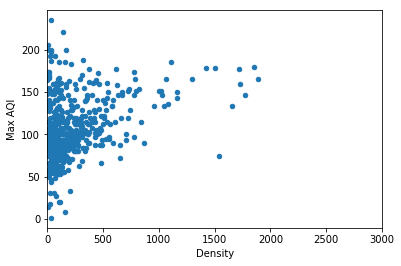

In [115]:
Low_AQI.plot(x = "Density", y = "Max AQI", kind = 'scatter')
plt.show()

In [116]:
Low_AQI.corr()["Max AQI"]

Year                                        NaN
Days with AQI                          0.434758
Good Days                             -0.020056
Moderate Days                          0.587594
Unhealthy for Sensitive Groups Days    0.555972
Unhealthy Days                         0.427808
Very Unhealthy Days                    0.222026
Hazardous Days                              NaN
Max AQI                                1.000000
90th Percentile AQI                    0.725316
Median AQI                             0.554075
Days CO                                0.074315
Days NO2                               0.155422
Days Ozone                             0.311403
Days SO2                              -0.044766
Days PM2.5                             0.038930
Days PM10                              0.024669
SE_T002_002                            0.357163
SE_T014_003                            0.364820
SE_T014_001                            0.368591
SE_T057_001                            0